# Preparing the COVID-19 Dataset

## This first notebook will focus on loading in the data from Kaggle and prepare it for an Exploratory Data Analysis

First of all, let's import all the data, make sure that there are no missing values, that everything is merged and aligned. I want to make this as simple and robust as possible so every new stream of data that comes in will be ready for analysis

### Raw Data Sources
* Main = covid_19_data.csv
* Confirmed cases = time_series_covid_19_confirmed.csv
* Death cases = time_series_covid_19_deaths.csv
* Recovered cases = time_series_covid_19_recovered.csv

Per case report:
* Line list = COVID19_line_list_data.csv
* Open line list = COVID19_open_line_list.csv

### Changes
* 19-03-2020: Start of project
* 23-03-2020: New data on cases + graph on new data

In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline 

### Loading files into DataFrames

In [51]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dylanye/Kaggle-COVID19-EIM-Functions/master/data/01_raw/covid_19_data.csv', index_col=0)
confirmed_df = pd.read_csv(r'https://raw.githubusercontent.com/dylanye/Kaggle-COVID19-EIM-Functions/master/data/01_raw/time_series_covid_19_confirmed.csv')
deaths_df = pd.read_csv(r'https://raw.githubusercontent.com/dylanye/Kaggle-COVID19-EIM-Functions/master/data/01_raw/time_series_covid_19_deaths.csv')
recovered_df = pd.read_csv(r'https://raw.githubusercontent.com/dylanye/Kaggle-COVID19-EIM-Functions/master/data/01_raw/time_series_covid_19_recovered.csv')

In [52]:
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [53]:
df = df.set_index('ObservationDate')

In [54]:
df.tail()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,
2020-03-22,NaN,Jersey,2020-03-17 18:33:03,0.0,0.0,0.0
2020-03-22,NaN,Puerto Rico,2020-03-22 22:43:02,0.0,1.0,0.0
2020-03-22,NaN,Republic of the Congo,2020-03-17 21:33:03,0.0,0.0,0.0
2020-03-22,NaN,The Bahamas,2020-03-19 12:13:38,0.0,0.0,0.0
2020-03-22,NaN,The Gambia,2020-03-18 14:13:56,0.0,0.0,0.0


In [56]:
confirmed_df.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
952,Bermuda,United Kingdom,32.3078,-64.7505,0,0,0,0,0,0,...,0,0,0,0,0,0,2,NaN,NaN,NaN
953,NaN,Chad,15.4542,18.7322,0,0,0,0,0,0,...,0,0,0,0,0,0,1,NaN,NaN,NaN
954,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,0,0,0,0,0,0,1,NaN,NaN,NaN
955,NaN,Fiji,-17.7134,178.065,0,0,0,0,0,0,...,0,0,0,0,0,0,1,NaN,NaN,NaN
956,NaN,Nicaragua,12.8654,-85.2072,0,0,0,0,0,0,...,0,0,0,0,0,0,1,NaN,NaN,NaN


In [34]:
cols = confirmed_df.keys()

### Get all the dates since the outbreak 

In [45]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recovered = recovered_df.loc[:, cols[4]:cols[-1]]

### Extract information on cases known since outbreak

In [46]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

TypeError: can only concatenate str (not "int") to str

In [46]:
# Optionally, convert the lists above into arrays for analysis. 
# Skipped now to be able to create a DataFrame from a tuple

#world_cases = np.array(world_cases).reshape(-1, 1)
#total_deaths = np.array(total_deaths).reshape(-1, 1)
#total_recovered = np.array(total_recovered).reshape(-1, 1)
#mortality_rate = np.array(mortality_rate).reshape(-1, 1)

In [ ]:
d = {'dates':list(dates),
     'world_cases':world_cases,
     'total_deaths':total_deaths,
     'total_recovered':total_recovered,
     'mortality_rate':mortality_rate}
data = pd.DataFrame(d)
data.set_index('dates')

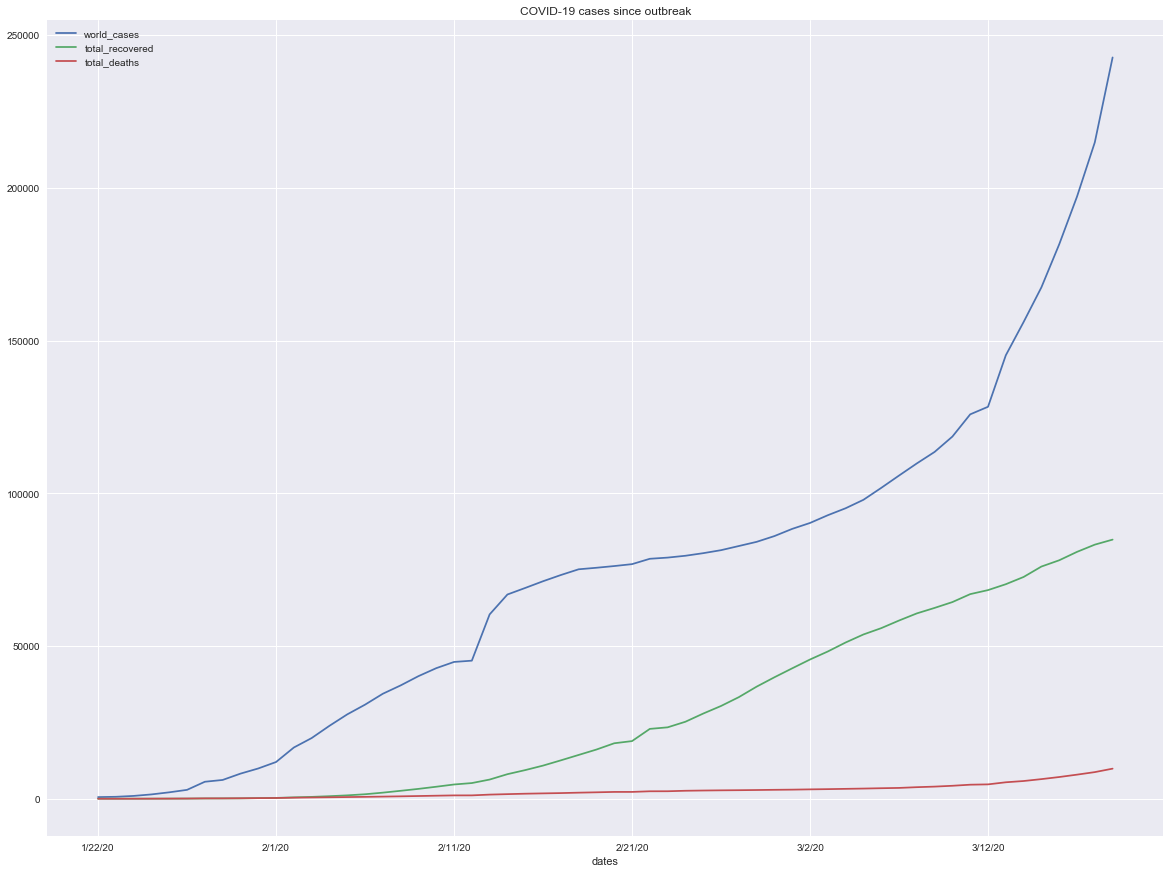

In [45]:
data.plot(x='dates', y=['world_cases','total_recovered','total_deaths'], kind='line', figsize=(20,15), title='COVID-19 cases since outbreak')